In [167]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
gamma = 0.5   # Cost unitary parameter
beta  = 0.5   # Mixing unitary parameter
n_qubits = 3  # Four spins / qubits

trotter_steps = 50
T = 10.0

# Create a QuantumCircuit with 4 qubits and 4 classical bits
qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits, name='cr')
qc = QuantumCircuit(qr, cr)

# === STEP 1: Prepare a uniform superposition ===
for i in range(n_qubits):
    qc.h(i)

# Step 2: Trotterized evolution
for step in range(trotter_steps):
    # === STEP 2: Apply the Cost Unitary U_C(gamma) ===
    # H_C = 4 Z0 Z1 + 4 Z0 Z2 + 6 Z0 Z3 + 8 Z1 Z2 + 12 Z1 Z3 + 12 Z2 Z3
    # Implement each ZZ term using Rzz.

    t = (step + 1) * (T / trotter_steps)
    s_t = t / T
    
    #qc.rzz(-2 * s_t * gamma * 4 * (T / trotter_steps), 0, 1)
    #qc.rzz(-2 * s_t * gamma * 4 * (T / trotter_steps), 0, 2)
    #qc.rzz(-2 * s_t * gamma * 6 * (T / trotter_steps), 0, 3)
    #qc.rzz(-2 * s_t * gamma * 8 * (T / trotter_steps), 1, 2)
    #qc.rzz(-2 * s_t * gamma * 12 * (T / trotter_steps), 1, 3)
    #qc.rzz(-2 * s_t * gamma * 12 * (T / trotter_steps), 2, 3)

    qc.rzz(-2 * s_t * gamma * 6 * (T / trotter_steps), 0, 1)
    qc.rzz(-2 * s_t * gamma * 4 * (T / trotter_steps), 0, 2)
    qc.rzz(-2 * s_t * gamma * 12 * (T / trotter_steps), 1, 2)
    
    #qc.rzz(abs(-2 * s_t * gamma * 6 * (T / trotter_steps)), 0, 1)
    #qc.rzz(abs(-2 * s_t * gamma * 4 * (T / trotter_steps)), 0, 2)
    #qc.rzz(abs(-2 * s_t * gamma * 12 * (T / trotter_steps)), 1, 2)    
    
# === STEP 3: Apply the Mixing Unitary U_M(beta) ===
for i in range(n_qubits):
    qc.rx(2 * beta, i)

# === STEP 4: Measurement ===
qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit
#qc.draw(output='mpl', style='iqp')


{'101': 282, '110': 170, '100': 48, '111': 30, '010': 256, '001': 164, '000': 48, '011': 26}


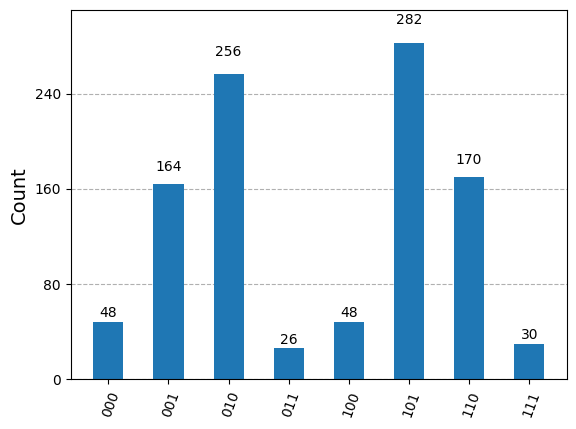

In [168]:
simulator = BasicSimulator()

# Simulate the circuit
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

{'110': 132, '111': 122, '010': 130, '011': 131, '001': 153, '100': 109, '000': 114, '101': 133}


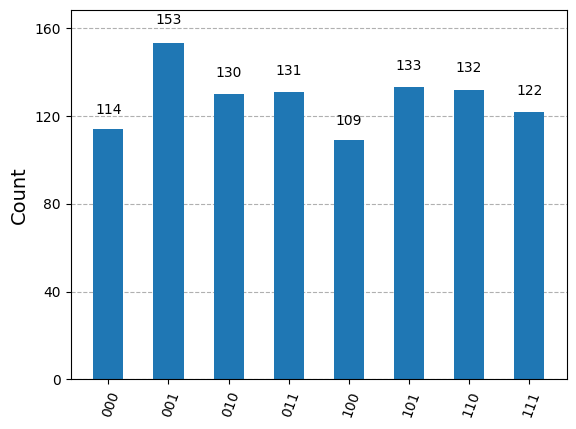

In [142]:
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeKyiv

backend = FakeKyiv()

# Define Sampler
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

# Run calculation
job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

print(counts)

# Plot the histogram
plot_histogram(counts)

{'100': 141, '011': 145, '010': 322, '101': 354, '111': 18, '110': 7, '001': 13, '000': 24}


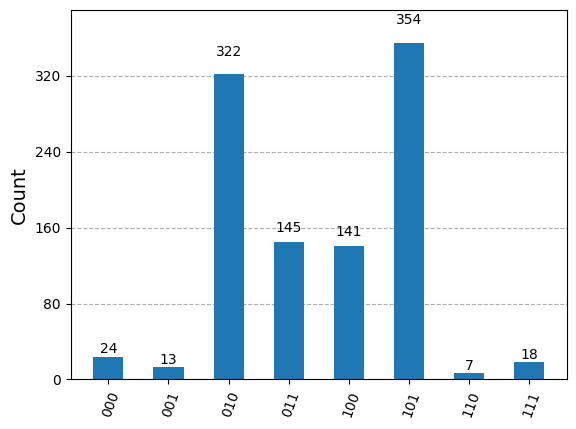

In [78]:
backend = BasicSimulator()

# Define Sampler
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

# Run calculation
job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

print(counts)

# Plot the histogram
plot_histogram(counts)

In [72]:
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
 
api_token = '...'
# If you did not previously save your credentials, use the following line instead:
service = QiskitRuntimeService(channel="ibm_quantum", token=api_token)
 
# Get a backend
backend = service.least_busy(operational=True, simulator=False)
 
# Define Sampler
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

# Run calculation
#job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

print(counts)

# Plot the histogram
plot_histogram(counts)

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'